<a href="https://colab.research.google.com/github/simpleego/notebook/blob/main/rbf_ex01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import svm, datasets


In [7]:
iris = datasets.load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.feature_names)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
#Kernel을 linear로 잡아봄, 아래는 parameter를 조정해보는 실습
x=iris.data[:, :2]
y=iris.target
SVM = svm.SVC(kernel='linear', C=1).fit(x,y)


In [10]:
x_min, x_max=x[:,0].min()-1, x[:,0].max()+1
y_min, y_max=x[:,1].min()-1,x[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))


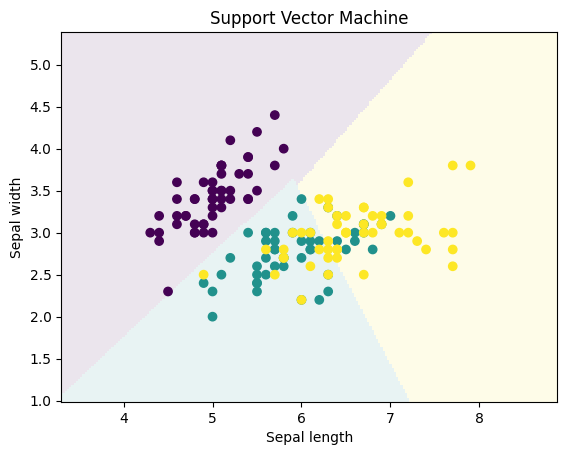

정확도: 0.82


In [11]:
z=SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도:',SVM.score(X=x, y=y))


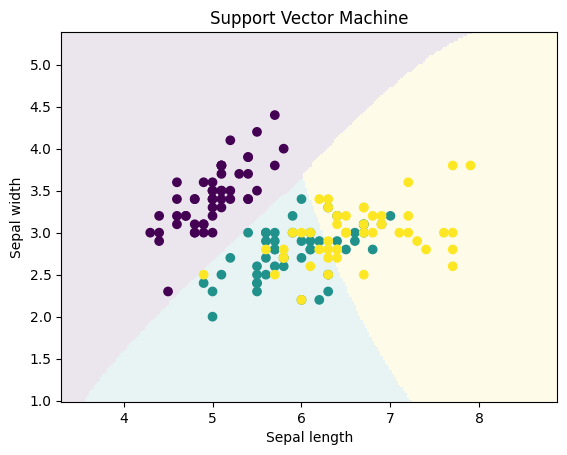

정확도: 0.82


In [12]:
#커널바꿔봄 linear->rbf
SVM = svm.SVC(kernel='rbf', C=1).fit(x,y)
z=SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도:',SVM.score(X=x, y=y))


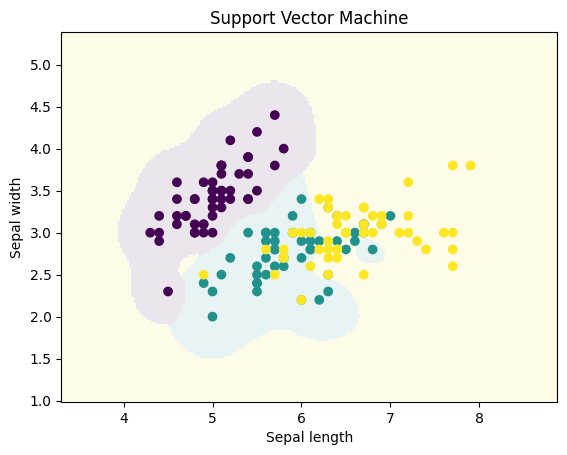

정확도: 0.84


In [13]:
#커널바꿔봄 linear->rbf, gamma=10
SVM = svm.SVC(kernel='rbf', C=1, gamma=10).fit(x,y)
z=SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도:',SVM.score(X=x, y=y))


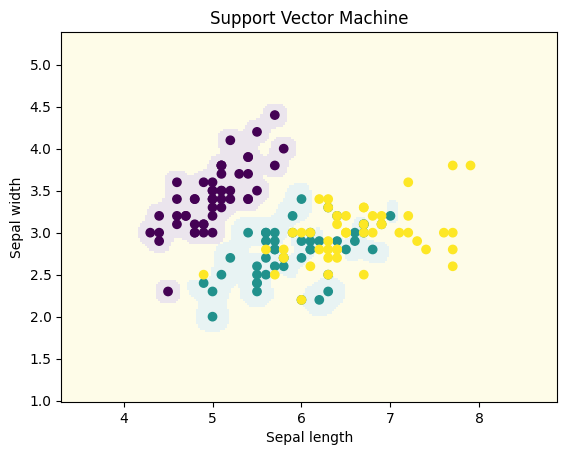

정확도: 0.92


In [14]:
#커널바꿔봄 linear->rbf, gamma=100, 과적합 상태를 보여줌
SVM = svm.SVC(kernel='rbf', C=1, gamma=100).fit(x,y)
z=SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도:',SVM.score(X=x, y=y))


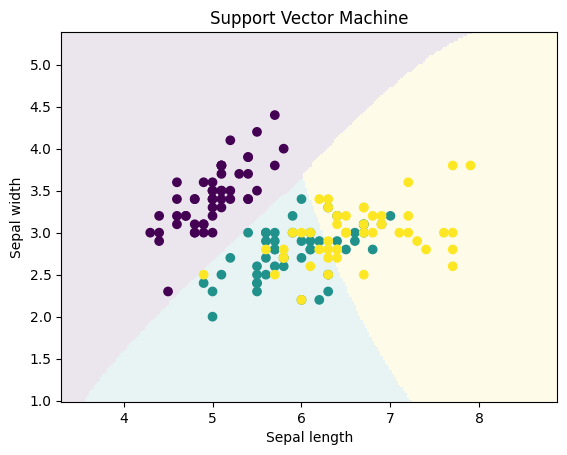

정확도: 0.82


In [15]:
#커널바꿔봄 linear->rbf, gamma=auto (auto:별도입력안함)
SVM = svm.SVC(kernel='rbf', C=1).fit(x,y)
z=SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도:',SVM.score(X=x, y=y))


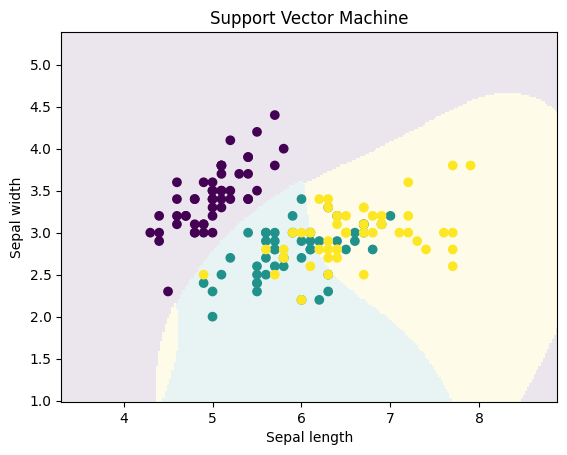

정확도: 0.8333333333333334


In [16]:
#커널바꿔봄 linear->rbf, C=100, gamma=auto, 초평면과 margin이 작아짐
SVM = svm.SVC(kernel='rbf', C=100).fit(x,y)
z=SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도:',SVM.score(X=x, y=y))


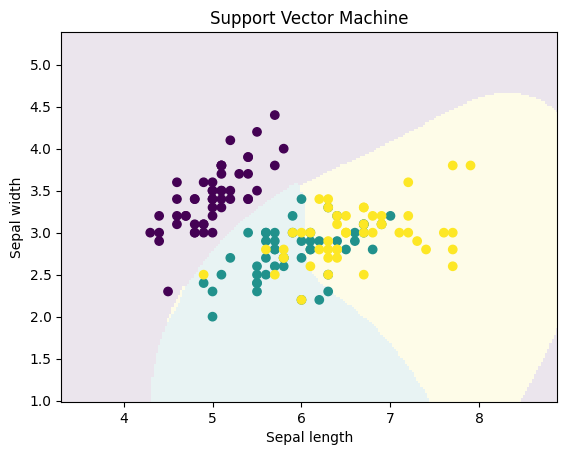

정확도: 0.82


In [17]:
#커널바꿔봄 linear->rbf, C=1000, gamma=auto, C=100일때와 유사한 결과
SVM = svm.SVC(kernel='rbf', C=1000).fit(x,y)
z=SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도:',SVM.score(X=x, y=y))
